* refs https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

# 1. Warm-up: numpy

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 12, 7

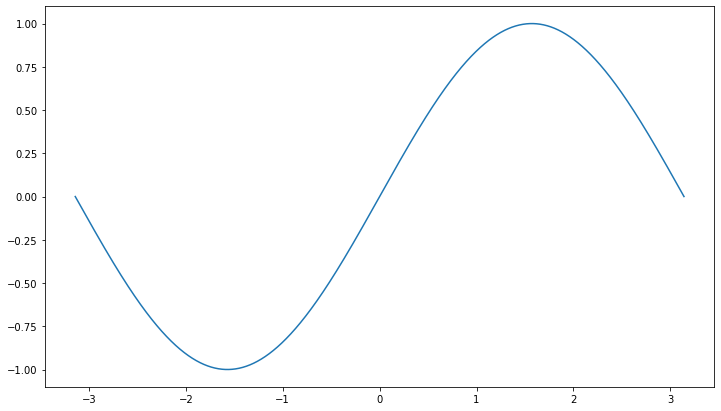

In [4]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

fig = plt.plot(x, y)

In [5]:
# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6

In [6]:
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

99 1920.5860741142856
199 1283.8934169689448
299 859.6884790644467
399 576.9239420888512
499 388.34729416042234
599 262.5197367272869
699 178.51573486536466
799 122.40159290809814
899 84.89523498695473
999 59.81047129273573
1099 43.02242140582736
1199 31.779262332653616
1299 24.24419354421064
1399 19.190489112684368
1499 15.798384513323077
1599 13.519730307669283
1699 11.9877600526418
1799 10.956904675034771
1899 10.262626992085
1999 9.794602060421614


In [7]:
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

Result: y = -0.019221633565937913 + 0.8320018859090547 x + 0.0033160516394874313 x^2 + -0.0898114878126504 x^3


In [8]:
y_pred = a + b * x + c * x ** 2 + d * x ** 3

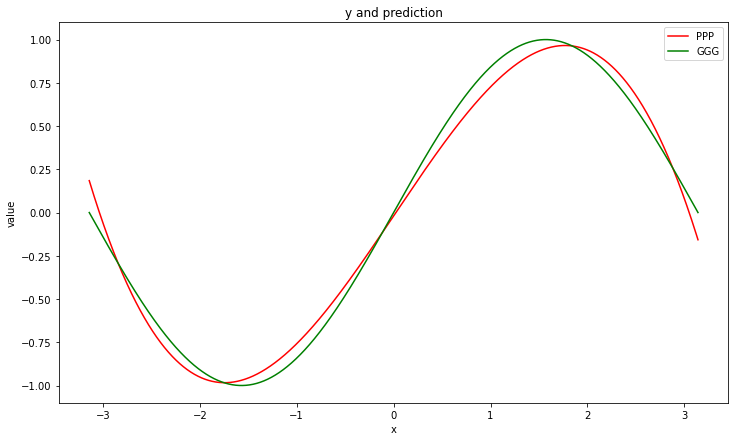

In [16]:
plt.plot(x, y_pred, color='r', label='PPP')
plt.plot(x, y, color='g', label='GGG')
plt.xlabel("x")
plt.ylabel('value')
plt.title('y and prediction')
plt.legend()
plt.show()

# 2. PyTorch: Tensors

* https://medium.com/@anoorasfatima/10-most-common-maths-operation-with-pytorchs-tensor-70a491d8cafd
* A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

* Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to specify the correct device.


import torch

In [41]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU
print(f"type(dtype): {type(dtype)}")
print(f"type(device: {type(device)})")

type(dtype): <class 'torch.dtype'>
type(device: <class 'torch.device'>)


In [42]:
# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

* shape or size()

In [72]:
e = torch.randn(())
print(e, e.shape)
print(e.numpy().shape)
e = torch.randn(1)
print(e, e.shape)
print(e.numpy().shape)
print(np.array(1).shape)
print(np.array([1]).shape)

tensor(0.8881) torch.Size([])
()
tensor([1.7502]) torch.Size([1])
(1,)
()
(1,)


In [43]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
#     loss = (y_pred - y).pow(2).sum().item()
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

99 tensor(433.4680)
199 tensor(295.7434)
299 tensor(202.8835)
399 tensor(140.2121)
499 tensor(97.8738)
599 tensor(69.2426)
699 tensor(49.8611)
799 tensor(36.7270)
899 tensor(27.8172)
999 tensor(21.7663)
1099 tensor(17.6525)
1199 tensor(14.8525)
1299 tensor(12.9446)
1399 tensor(11.6431)
1499 tensor(10.7542)
1599 tensor(10.1464)
1699 tensor(9.7304)
1799 tensor(9.4453)
1899 tensor(9.2496)
1999 tensor(9.1153)


In [32]:
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

Result: y = -2.836569728970062e-05 + 0.8567265868186951 x + 4.8926826821116265e-06 x^2 + -0.09332836419343948 x^3


In [33]:
print(f"type(x)={type(x)}")
print(f"type(y)={type(y)}")

type(x)=<class 'torch.Tensor'>
type(y)=<class 'torch.Tensor'>


* matplotlib.pyplot can get data from tensor

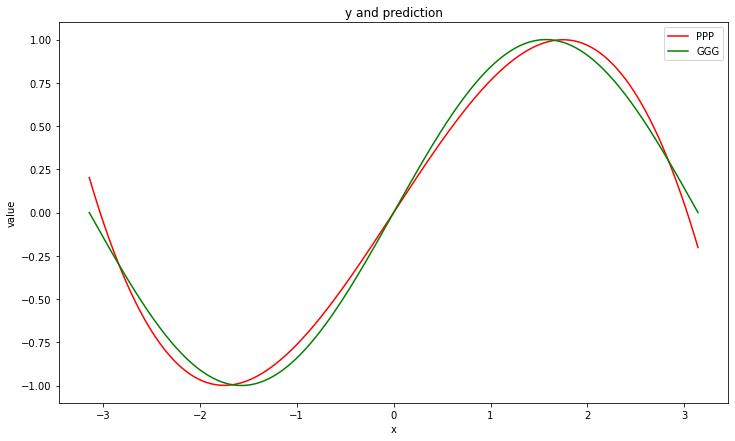

In [34]:
plt.plot(x, y_pred, color='r', label='PPP')
plt.plot(x, y, color='g', label='GGG')
plt.xlabel("x")
plt.ylabel('value')
plt.title('y and prediction')
plt.legend()
plt.show()

# 3. PyTorch: Tensors and autograd

* Thankfully, we can use automatic differentiation to automate the computation of backward passes in neural networks.

In [51]:

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

* Setting requires_grad=True

In [65]:
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

In [73]:
learning_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = (y_pred - y).pow(2).sum()

    if t % 100 == 99:
#         print(t, loss.item())
        print(y_pred.shape, t, loss)

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

torch.Size([2000]) 99 tensor(667.7597, grad_fn=<SumBackward0>)
torch.Size([2000]) 199 tensor(445.5374, grad_fn=<SumBackward0>)
torch.Size([2000]) 299 tensor(298.3024, grad_fn=<SumBackward0>)
torch.Size([2000]) 399 tensor(200.7372, grad_fn=<SumBackward0>)
torch.Size([2000]) 499 tensor(136.0767, grad_fn=<SumBackward0>)
torch.Size([2000]) 599 tensor(93.2168, grad_fn=<SumBackward0>)
torch.Size([2000]) 699 tensor(64.8029, grad_fn=<SumBackward0>)
torch.Size([2000]) 799 tensor(45.9627, grad_fn=<SumBackward0>)
torch.Size([2000]) 899 tensor(33.4680, grad_fn=<SumBackward0>)
torch.Size([2000]) 999 tensor(25.1801, grad_fn=<SumBackward0>)
torch.Size([2000]) 1099 tensor(19.6814, grad_fn=<SumBackward0>)
torch.Size([2000]) 1199 tensor(16.0325, grad_fn=<SumBackward0>)
torch.Size([2000]) 1299 tensor(13.6104, grad_fn=<SumBackward0>)
torch.Size([2000]) 1399 tensor(12.0024, grad_fn=<SumBackward0>)
torch.Size([2000]) 1499 tensor(10.9345, grad_fn=<SumBackward0>)
torch.Size([2000]) 1599 tensor(10.2251, grad_f

In [54]:
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

Result: y = 0.036297962069511414 + 0.8434703946113586 x + -0.006261999253183603 x^2 + -0.0914427787065506 x^3


* detach: Returns a new Tensor, detached from the current graph.

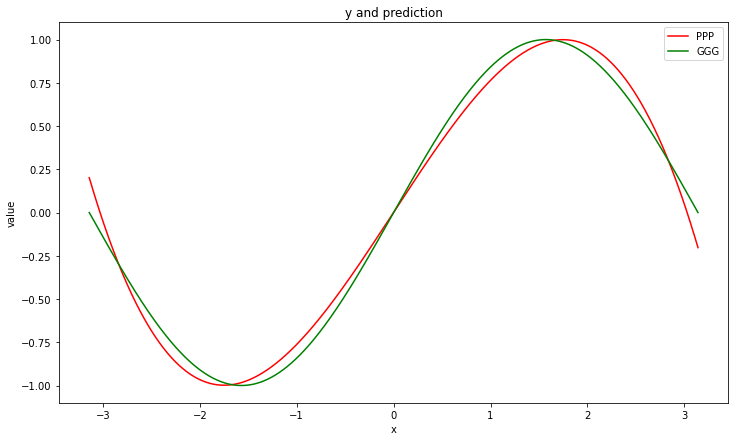

In [62]:
y_hat = y_pred.detach()
# y_hat = y_pred.detach().numpy()
plt.plot(x, y_hat, color='r', label='PPP')
plt.plot(x, y, color='g', label='GGG')
plt.xlabel("x")
plt.ylabel('value')
plt.title('y and prediction')
plt.legend()
plt.show()

# 4. PyTorch: Defining new autograd functions

* Under the hood, each primitive autograd operator is really two functions that operate on Tensors. 
* The forward function computes output Tensors from input Tensors. 
* The backward function receives the gradient of the output Tensors with respect to some scalar value, and computes the gradient of the input Tensors with respect to that same scalar value.

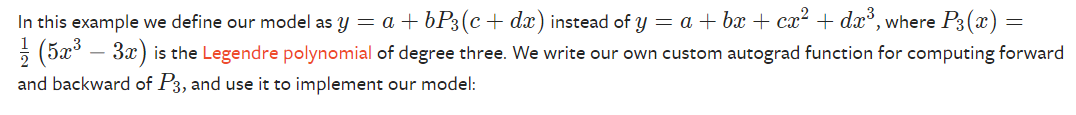

* <span class="girk">ctx is a context object that can be used to stash information for backward computation</span>
* <span class="girk">In the backward pass we receive a Tensor (grad_output) containing the gradient of the loss with respect to the output</span>

In [78]:
class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)

In [80]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

In [81]:
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

In [82]:
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

<div class="mark">
* To apply our Function, we use Function.apply method. We alias this as 'P3'.</div><i class="fa fa-lightbulb-o "></i>

In [87]:
learning_rate = 1e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
#         print(t, loss.item())
        print(y_pred.shape, t, loss)

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

torch.Size([2000]) 99 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 199 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 299 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 399 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 499 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 599 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 699 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 799 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 899 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 999 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 1099 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 1199 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 1299 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 1399 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 1499 tensor(8.8172, grad_fn=<SumBackward0>)
torch.Size([2000]) 1599 tensor(8.8172, grad_fn=<SumBackward0>)
tor

In [88]:
print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

Result: y = -1.0856260335145862e-09 + -2.2337563037872314 * P3(-3.7009777464902527e-09 + 0.2556576728820801 x)


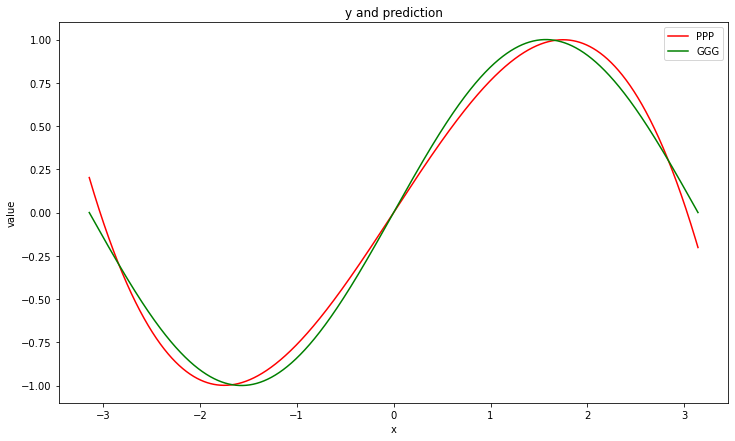

In [89]:
y_hat = y_pred.detach()
# y_hat = y_pred.detach().numpy()
plt.plot(x, y_hat, color='r', label='PPP')
plt.plot(x, y, color='g', label='GGG')
plt.xlabel("x")
plt.ylabel('value')
plt.title('y and prediction')
plt.legend()
plt.show()

# 5. PyTorch: nn

## 5.1. Prior knowledge 

### 5.1.1 Torch.unsqueeze

* TORCH.UNSQUEEZE

* torch.unsqueeze(input, dim) → Tensor
* https://pytorch.org/docs/1.9.0/generated/torch.unsqueeze.html#torch.unsqueeze

In [91]:
x = torch.Tensor([1, 2, 3, 4])
print(x, x.size())

tensor([1., 2., 3., 4.]) torch.Size([4])


In [92]:
print(torch.unsqueeze(x, 0))  
print(torch.unsqueeze(x, 0).size())  
print(torch.unsqueeze(x, 0).dim())  
print(torch.unsqueeze(x, 0).numpy()) 

tensor([[1., 2., 3., 4.]])
torch.Size([1, 4])
2
[[1. 2. 3. 4.]]


In [93]:
print(torch.unsqueeze(x, 1))  
print(torch.unsqueeze(x, 1).size())  
print(torch.unsqueeze(x, 1).dim())  
print(torch.unsqueeze(x, 1).numpy()) 

tensor([[1.],
        [2.],
        [3.],
        [4.]])
torch.Size([4, 1])
2
[[1.]
 [2.]
 [3.]
 [4.]]


In [94]:
print(torch.unsqueeze(x, -1))  
print(torch.unsqueeze(x, -1).size())  
print(torch.unsqueeze(x, -1).dim())  
print(torch.unsqueeze(x, -1).numpy()) 

tensor([[1.],
        [2.],
        [3.],
        [4.]])
torch.Size([4, 1])
2
[[1.]
 [2.]
 [3.]
 [4.]]


In [99]:
a = torch.randn(2,3,4)
print("(0)")
print(a,"\n",a.shape,"\n")

b = torch.squeeze(a)
print("(1)")
print(b,"\n",b.shape,"\n")

c = torch.squeeze(a,0)
print("(2)")
print(c,"\n",c.shape,"\n")

d = torch.squeeze(a,1)
print("(3)")
print(d,"\n",d.shape,"\n")

e = torch.squeeze(a,2)       #  !!!!! retain the raw
print("(4)")
print(e,"\n",e.shape,"\n")

(0)
tensor([[[ 0.9313, -0.3266,  0.0365, -0.1686],
         [-1.3693, -0.4047, -1.0487, -0.6092],
         [ 0.4194, -0.9643, -0.1379,  0.1962]],

        [[ 1.1074, -0.0605, -1.1605,  0.2535],
         [ 1.2359,  0.2080, -0.2623,  0.0530],
         [-0.7985, -0.8529, -0.6069,  0.6182]]]) 
 torch.Size([2, 3, 4]) 

(1)
tensor([[[ 0.9313, -0.3266,  0.0365, -0.1686],
         [-1.3693, -0.4047, -1.0487, -0.6092],
         [ 0.4194, -0.9643, -0.1379,  0.1962]],

        [[ 1.1074, -0.0605, -1.1605,  0.2535],
         [ 1.2359,  0.2080, -0.2623,  0.0530],
         [-0.7985, -0.8529, -0.6069,  0.6182]]]) 
 torch.Size([2, 3, 4]) 

(2)
tensor([[[ 0.9313, -0.3266,  0.0365, -0.1686],
         [-1.3693, -0.4047, -1.0487, -0.6092],
         [ 0.4194, -0.9643, -0.1379,  0.1962]],

        [[ 1.1074, -0.0605, -1.1605,  0.2535],
         [ 1.2359,  0.2080, -0.2623,  0.0530],
         [-0.7985, -0.8529, -0.6069,  0.6182]]]) 
 torch.Size([2, 3, 4]) 

(3)
tensor([[[ 0.9313, -0.3266,  0.0365, -0.1686],
 

In [101]:
a = torch.randn(1,3)
print(a,"\n",a.shape,"\n")

b = torch.unsqueeze(a,0)
print(b,"\n",b.shape,"\n")

c = torch.unsqueeze(a,1)
print(c,"\n",c.shape,"\n")

d = torch.unsqueeze(a,2)
print(d,"\n",d.shape,"\n")

e = torch.unsqueeze(a, -1)
print(e,"\n",e.shape,"\n")

tensor([[-1.4134, -0.4017,  2.1106]]) 
 torch.Size([1, 3]) 

tensor([[[-1.4134, -0.4017,  2.1106]]]) 
 torch.Size([1, 1, 3]) 

tensor([[[-1.4134, -0.4017,  2.1106]]]) 
 torch.Size([1, 1, 3]) 

tensor([[[-1.4134],
         [-0.4017],
         [ 2.1106]]]) 
 torch.Size([1, 3, 1]) 

tensor([[[-1.4134],
         [-0.4017],
         [ 2.1106]]]) 
 torch.Size([1, 3, 1]) 



### 5.1.2. Pytorch: torch.nn.Linear()

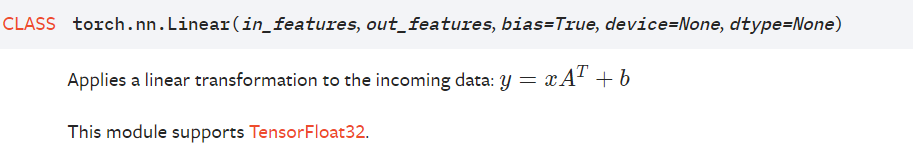

* <span class="girk">torch.mm()</span>
* torch.equal
* <span class="girk">torch.t()</span>

In [110]:
x = torch.randn(128, 20)     # input dim（128，20）
m = torch.nn.Linear(20, 30)  

In [117]:
# dir(m)
print(m.weight.size())
print(m.bias.size())

torch.Size([30, 20])
torch.Size([30])


In [118]:
output = m(x)
print(f"output.shape: {output.shape}")

output.shape: torch.Size([128, 30])


In [119]:
ans = torch.mm(x, m.weight.t()) + m.bias

<div class="burk">
* torch.equal(ans, output)</div><i class="fa fa-lightbulb-o "></i>

In [123]:
torch.equal(ans, output)

True

###  5.1.3. Pytorch: torch.flatten() & torch.flatten()

* torch.flatten(input, <span class="mark">start_dim=0</span>, end_dim=-1) → Tensor

* CLASS torch.nn<span class="burk">.F</span>latten(<span class="mark">start_dim=1</span>, end_dim=-1)  

In [129]:
x = torch.randn(2,4,2)
print(x,'\n', x.size(), '\n')
 
z = torch.flatten(x)
print(z, '\n', z.size(), '\n')
 
w = torch.flatten(x,1)
print(w, '\n', w.size(), '\n')

u = torch.flatten(x, 0, 1)
print(u, '\n', u.size(), '\n')

tensor([[[-0.4120,  0.2699],
         [-1.0787, -0.5242],
         [ 0.0323, -0.1513],
         [ 1.3634,  0.0103]],

        [[ 0.6252, -0.2464],
         [-0.5572,  0.3910],
         [-0.5937, -0.6944],
         [ 0.3164,  0.4768]]]) 
 torch.Size([2, 4, 2]) 

tensor([-0.4120,  0.2699, -1.0787, -0.5242,  0.0323, -0.1513,  1.3634,  0.0103,
         0.6252, -0.2464, -0.5572,  0.3910, -0.5937, -0.6944,  0.3164,  0.4768]) 
 torch.Size([16]) 

tensor([[-0.4120,  0.2699, -1.0787, -0.5242,  0.0323, -0.1513,  1.3634,  0.0103],
        [ 0.6252, -0.2464, -0.5572,  0.3910, -0.5937, -0.6944,  0.3164,  0.4768]]) 
 torch.Size([2, 8]) 

tensor([[-0.4120,  0.2699],
        [-1.0787, -0.5242],
        [ 0.0323, -0.1513],
        [ 1.3634,  0.0103],
        [ 0.6252, -0.2464],
        [-0.5572,  0.3910],
        [-0.5937, -0.6944],
        [ 0.3164,  0.4768]]) 
 torch.Size([8, 2]) 



In [130]:
x = torch.randn(32, 1, 5, 5)

model=torch.nn.Sequential(
    # # of input channel: 1，# of output channel: 6，kernel: 3*3, step: 1，padding=1
    torch.nn.Conv2d(1, 6, 3, 1, 1),
    torch.nn.Flatten()
)
output=model(x)
print(output.shape)  

torch.Size([32, 150])


* retain the <span class="burk">batch size</span> in dim 0

## 5.2. PyTorch: nn

In [131]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])

In [132]:
print(x.size())
print(p.size())
print(x.unsqueeze(-1).size())

torch.Size([2000])
torch.Size([3])
torch.Size([2000, 1])


In [133]:
xx = x.unsqueeze(-1).pow(p)
xx.size()

torch.Size([2000, 3])